Tokenizer app: https://tiktokenizer.vercel.app/

In this notebook the widely used BPE tokenizer (also used in ChatGPT) is implemented .

Strings in Python: immutable sequences of Unicode code points.

About UTF-8: https://www.reedbeta.com/blog/programmers-intro-to-unicode/

If we use the whole Unicode vocabulary, we would have 149813 tokens (similar to character level tokenization).

In [ ]:
ord('а'), ord('a')  # cyrilic vs latin

(1072, 97)

In [ ]:
[ord(x) for x in 'здраво zdravo']  # ord() returns the Unicode code point of a character

[1079, 1076, 1088, 1072, 1074, 1086, 32, 122, 100, 114, 97, 118, 111]

In [ ]:
print(list('здраво zdravo'.encode('utf-8')))

[208, 183, 208, 180, 209, 128, 208, 176, 208, 178, 208, 190, 32, 122, 100, 114, 97, 118, 111]


UTF-16 and UTF-32 are more 'wasteful': additional zeros.

In [ ]:
print(list('здраво zdravo'.encode('utf-16')))

[255, 254, 55, 4, 52, 4, 64, 4, 48, 4, 50, 4, 62, 4, 32, 0, 122, 0, 100, 0, 114, 0, 97, 0, 118, 0, 111, 0]


In [ ]:
print(list('здраво zdravo'.encode('utf-32')))

[255, 254, 0, 0, 55, 4, 0, 0, 52, 4, 0, 0, 64, 4, 0, 0, 48, 4, 0, 0, 50, 4, 0, 0, 62, 4, 0, 0, 32, 0, 0, 0, 122, 0, 0, 0, 100, 0, 0, 0, 114, 0, 0, 0, 97, 0, 0, 0, 118, 0, 0, 0, 111, 0, 0, 0]


# BPE

## Own implementation

In [ ]:
text = 'aaabdaaabac'

text_list = list(text)
text_vocab_list = list(set(text_list))
print('At initialization:')
print(f'Text list: {text_list}')
print(f'Vocabulary: {text_vocab_list}')

def build_pair_freq_vocabulary(str_list):
  pair_freq_vocabulary = {}
  for idx, ch1 in enumerate(str_list):
    if idx == len(str_list) - 1:
      break
    ch2 = str_list[idx+1]
    pair = ch1+ch2
    pair_freq_vocabulary[pair] = pair_freq_vocabulary.get(pair, 0) + 1
  return pair_freq_vocabulary

def break_BPE(dict_x):
  return all(x == 1 for x in list(dict_x.values()))

def update_text_list(ch_pair):
  idx = 0
  while (idx < len(text_list)-1):
    ch1 = text_list[idx]
    ch2 = text_list[idx+1]
    if ch1+ch2 == ch_pair:
      text_list.pop(idx)
      text_list.pop(idx)
      text_list.insert(idx, ch_pair)
    idx += 1

iteration = 0
while(True):
  iteration += 1
  print(100*'-')
  print(f'At iteration: {iteration}')
  pair_freq_vocabulary = build_pair_freq_vocabulary(text_list)
  print(f'Pair freq vocabulary: {pair_freq_vocabulary}')
  if break_BPE(pair_freq_vocabulary):
    print('BPE completed.')
    break

  max_ch_pair = max(pair_freq_vocabulary, key=pair_freq_vocabulary.get)
  update_text_list(max_ch_pair)
  text_vocab_list.append(max_ch_pair)

  print(f'Text list: {text_list}')
  print(f'Vocabulary: {text_vocab_list}')

  if iteration == 20:
    break

print(100*'-')
print('Final:')
print(f'Text list: {text_list}')
print(f'Vocabulary: {text_vocab_list}')
print(f'Vocabulary size: {len(text_vocab_list)}')


At initialization:
Text list: ['a', 'a', 'a', 'b', 'd', 'a', 'a', 'a', 'b', 'a', 'c']
Vocabulary: ['a', 'c', 'd', 'b']
----------------------------------------------------------------------------------------------------
At iteration: 1
Pair freq vocabulary: {'aa': 4, 'ab': 2, 'bd': 1, 'da': 1, 'ba': 1, 'ac': 1}
Text list: ['aa', 'a', 'b', 'd', 'aa', 'a', 'b', 'a', 'c']
Vocabulary: ['a', 'c', 'd', 'b', 'aa']
----------------------------------------------------------------------------------------------------
At iteration: 2
Pair freq vocabulary: {'aaa': 2, 'ab': 2, 'bd': 1, 'daa': 1, 'ba': 1, 'ac': 1}
Text list: ['aaa', 'b', 'd', 'aaa', 'b', 'a', 'c']
Vocabulary: ['a', 'c', 'd', 'b', 'aa', 'aaa']
----------------------------------------------------------------------------------------------------
At iteration: 3
Pair freq vocabulary: {'aaab': 2, 'bd': 1, 'daaa': 1, 'ba': 1, 'ac': 1}
Text list: ['aaab', 'd', 'aaab', 'a', 'c']
Vocabulary: ['a', 'c', 'd', 'b', 'aa', 'aaa', 'aaab']
----------

## Tutorial implementation

In [ ]:
# text = 1st paragraph from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = 'Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.'

tokens = text.encode('utf-8')  # raw bytes
tokens = list(map(int, tokens))  # convert to list of integers in range 0-255 for convinience
print(50*'-')
print(text)
print('Text length:', len(text), 'codepoints')
print(50*'-')
print(tokens)
print('Tokens length:', len(tokens), 'bytes')


--------------------------------------------------
Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺‌🇳‌🇮‌🇨‌🇴‌🇩‌🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.
Text length: 533 codepoints
--------------------------------------------------
[239, 188, 181, 239, 189, 142, 239, 189, 137, 239, 189, 131, 239, 189, 143, 239, 189, 132, 239, 189, 133, 33, 32, 240, 159, 133, 164, 240, 159, 133, 157, 240, 159, 133, 152, 240, 159, 133, 146, 240, 159, 133, 158, 240, 159, 133, 147, 240, 159, 133, 148, 226, 128, 189, 32, 240, 159, 135, 186, 226, 128, 140, 240, 159, 135, 179, 226, 128

A lot of the simple ASCII characters just become a single byte. The more complicated characters become multiple bytes (up to 4 bytes).

In [ ]:
def get_stats(ids):
  counts = {}
  for pair in zip(ids, ids[1:]):
    counts[pair] = counts.get(pair, 0) + 1
  return counts

stats = get_stats(tokens)
# print(stats)
# print(sorted(((v, k) for k, v in stats.items()), reverse=True))

top_pair = max(stats, key=stats.get)
top_pair

(101, 32)

In [ ]:
chr(101), chr(32)  # char is the opposite of ord

('e', ' ')

Many words end on 'e'.

In [ ]:
def merge(ids, pair, idx):
  '''
  ids: list of ints
  pair: tuple of ints
  idx: int
  In the list of ints (ids), replace all consecutive occurences of a pair with the new token idx'''
  new_ids = []
  i = 0
  while i < len(ids):
    # If we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      new_ids.append(idx)
      i += 2
    else:
      new_ids.append(ids[i])
      i += 1
  return new_ids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

[5, 6, 99, 9, 1]


In [ ]:
tokens2 = merge(tokens, top_pair, 256)
# print(tokens2)
print('length:', len(tokens2))

length: 596


In [ ]:
# Making the training text longer to have more representative token statistics
# The whole text from https://www.reedbeta.com/blog/programmers-intro-to-unicode/
text = '''A Programmer’s Introduction to Unicode March 3, 2017 · Coding · 22 Comments  Ｕｎｉｃｏｄｅ! 🅤🅝🅘🅒🅞🅓🅔‽ 🇺\u200c🇳\u200c🇮\u200c🇨\u200c🇴\u200c🇩\u200c🇪! 😄 The very name strikes fear and awe into the hearts of programmers worldwide. We all know we ought to “support Unicode” in our software (whatever that means—like using wchar_t for all the strings, right?). But Unicode can be abstruse, and diving into the thousand-page Unicode Standard plus its dozens of supplementary annexes, reports, and notes can be more than a little intimidating. I don’t blame programmers for still finding the whole thing mysterious, even 30 years after Unicode’s inception.  A few months ago, I got interested in Unicode and decided to spend some time learning more about it in detail. In this article, I’ll give an introduction to it from a programmer’s point of view.  I’m going to focus on the character set and what’s involved in working with strings and files of Unicode text. However, in this article I’m not going to talk about fonts, text layout/shaping/rendering, or localization in detail—those are separate issues, beyond my scope (and knowledge) here.  Diversity and Inherent Complexity The Unicode Codespace Codespace Allocation Scripts Usage Frequency Encodings UTF-8 UTF-16 Combining Marks Canonical Equivalence Normalization Forms Grapheme Clusters And More… Diversity and Inherent Complexity As soon as you start to study Unicode, it becomes clear that it represents a large jump in complexity over character sets like ASCII that you may be more familiar with. It’s not just that Unicode contains a much larger number of characters, although that’s part of it. Unicode also has a great deal of internal structure, features, and special cases, making it much more than what one might expect a mere “character set” to be. We’ll see some of that later in this article.  When confronting all this complexity, especially as an engineer, it’s hard not to find oneself asking, “Why do we need all this? Is this really necessary? Couldn’t it be simplified?”  However, Unicode aims to faithfully represent the entire world’s writing systems. The Unicode Consortium’s stated goal is “enabling people around the world to use computers in any language”. And as you might imagine, the diversity of written languages is immense! To date, Unicode supports 135 different scripts, covering some 1100 languages, and there’s still a long tail of over 100 unsupported scripts, both modern and historical, which people are still working to add.  Given this enormous diversity, it’s inevitable that representing it is a complicated project. Unicode embraces that diversity, and accepts the complexity inherent in its mission to include all human writing systems. It doesn’t make a lot of trade-offs in the name of simplification, and it makes exceptions to its own rules where necessary to further its mission.  Moreover, Unicode is committed not just to supporting texts in any single language, but also to letting multiple languages coexist within one text—which introduces even more complexity.  Most programming languages have libraries available to handle the gory low-level details of text manipulation, but as a programmer, you’ll still need to know about certain Unicode features in order to know when and how to apply them. It may take some time to wrap your head around it all, but don’t be discouraged—think about the billions of people for whom your software will be more accessible through supporting text in their language. Embrace the complexity!  The Unicode Codespace Let’s start with some general orientation. The basic elements of Unicode—its “characters”, although that term isn’t quite right—are called code points. Code points are identified by number, customarily written in hexadecimal with the prefix “U+”, such as U+0041 “A” latin capital letter a or U+03B8 “θ” greek small letter theta. Each code point also has a short name, and quite a few other properties, specified in the Unicode Character Database.  The set of all possible code points is called the codespace. The Unicode codespace consists of 1,114,112 code points. However, only 128,237 of them—about 12% of the codespace—are actually assigned, to date. There’s plenty of room for growth! Unicode also reserves an additional 137,468 code points as “private use” areas, which have no standardized meaning and are available for individual applications to define for their own purposes.  Codespace Allocation To get a feel for how the codespace is laid out, it’s helpful to visualize it. Below is a map of the entire codespace, with one pixel per code point. It’s arranged in tiles for visual coherence; each small square is 16×16 = 256 code points, and each large square is a “plane” of 65,536 code points. There are 17 planes altogether.  Map of the Unicode codespace (click to zoom)  White represents unassigned space. Blue is assigned code points, green is private-use areas, and the small red area is surrogates (more about those later). As you can see, the assigned code points are distributed somewhat sparsely, but concentrated in the first three planes.  Plane 0 is also known as the “Basic Multilingual Plane”, or BMP. The BMP contains essentially all the characters needed for modern text in any script, including Latin, Cyrillic, Greek, Han (Chinese), Japanese, Korean, Arabic, Hebrew, Devanagari (Indian), and many more.  (In the past, the codespace was just the BMP and no more—Unicode was originally conceived as a straightforward 16-bit encoding, with only 65,536 code points. It was expanded to its current size in 1996. However, the vast majority of code points in modern text belong to the BMP.)  Plane 1 contains historical scripts, such as Sumerian cuneiform and Egyptian hieroglyphs, as well as emoji and various other symbols. Plane 2 contains a large block of less-common and historical Han characters. The remaining planes are empty, except for a small number of rarely-used formatting characters in Plane 14; planes 15–16 are reserved entirely for private use.  Scripts Let’s zoom in on the first three planes, since that’s where the action is:  Map of scripts in Unicode planes 0–2 (click to zoom)  This map color-codes the 135 different scripts in Unicode. You can see how Han () and Korean () take up most of the range of the BMP (the left large square). By contrast, all of the European, Middle Eastern, and South Asian scripts fit into the first row of the BMP in this diagram.  Many areas of the codespace are adapted or copied from earlier encodings. For example, the first 128 code points of Unicode are just a copy of ASCII. This has clear benefits for compatibility—it’s easy to losslessly convert texts from smaller encodings into Unicode (and the other direction too, as long as no characters outside the smaller encoding are used).  Usage Frequency One more interesting way to visualize the codespace is to look at the distribution of usage—in other words, how often each code point is actually used in real-world texts. Below is a heat map of planes 0–2 based on a large sample of text from Wikipedia and Twitter (all languages). Frequency increases from black (never seen) through red and yellow to white.  Heat map of code point usage frequency in Unicode planes 0–2 (click to zoom)  You can see that the vast majority of this text sample lies in the BMP, with only scattered usage of code points from planes 1–2. The biggest exception is emoji, which show up here as the several bright squares in the bottom row of plane 1.  Encodings We’ve seen that Unicode code points are abstractly identified by their index in the codespace, ranging from U+0000 to U+10FFFF. But how do code points get represented as bytes, in memory or in a file?  The most convenient, computer-friendliest (and programmer-friendliest) thing to do would be to just store the code point index as a 32-bit integer. This works, but it consumes 4 bytes per code point, which is sort of a lot. Using 32-bit ints for Unicode will cost you a bunch of extra storage, memory, and performance in bandwidth-bound scenarios, if you work with a lot of text.  Consequently, there are several more-compact encodings for Unicode. The 32-bit integer encoding is officially called UTF-32 (UTF = “Unicode Transformation Format”), but it’s rarely used for storage. At most, it comes up sometimes as a temporary internal representation, for examining or operating on the code points in a string.  Much more commonly, you’ll see Unicode text encoded as either UTF-8 or UTF-16. These are both variable-length encodings, made up of 8-bit or 16-bit units, respectively. In these schemes, code points with smaller index values take up fewer bytes, which saves a lot of memory for typical texts. The trade-off is that processing UTF-8/16 texts is more programmatically involved, and likely slower.  UTF-8 In UTF-8, each code point is stored using 1 to 4 bytes, based on its index value.  UTF-8 uses a system of binary prefixes, in which the high bits of each byte mark whether it’s a single byte, the beginning of a multi-byte sequence, or a continuation byte; the remaining bits, concatenated, give the code point index. This table shows how it works:  UTF-8 (binary)\tCode point (binary)\tRange 0xxxxxxx\txxxxxxx\tU+0000–U+007F 110xxxxx 10yyyyyy\txxxxxyyyyyy\tU+0080–U+07FF 1110xxxx 10yyyyyy 10zzzzzz\txxxxyyyyyyzzzzzz\tU+0800–U+FFFF 11110xxx 10yyyyyy 10zzzzzz 10wwwwww\txxxyyyyyyzzzzzzwwwwww\tU+10000–U+10FFFF A handy property of UTF-8 is that code points below 128 (ASCII characters) are encoded as single bytes, and all non-ASCII code points are encoded using sequences of bytes 128–255. This has a couple of nice consequences. First, any strings or files out there that are already in ASCII can also be interpreted as UTF-8 without any conversion. Second, lots of widely-used string programming idioms—such as null termination, or delimiters (newlines, tabs, commas, slashes, etc.)—will just work on UTF-8 strings. ASCII bytes never occur inside the encoding of non-ASCII code points, so searching byte-wise for a null terminator or a delimiter will do the right thing.  Thanks to this convenience, it’s relatively simple to extend legacy ASCII programs and APIs to handle UTF-8 strings. UTF-8 is very widely used in the Unix/Linux and Web worlds, and many programmers argue UTF-8 should be the default encoding everywhere.  However, UTF-8 isn’t a drop-in replacement for ASCII strings in all respects. For instance, code that iterates over the “characters” in a string will need to decode UTF-8 and iterate over code points (or maybe grapheme clusters—more about those later), not bytes. When you measure the “length” of a string, you’ll need to think about whether you want the length in bytes, the length in code points, the width of the text when rendered, or something else.  UTF-16 The other encoding that you’re likely to encounter is UTF-16. It uses 16-bit words, with each code point stored as either 1 or 2 words.  Like UTF-8, we can express the UTF-16 encoding rules in the form of binary prefixes:  UTF-16 (binary)\tCode point (binary)\tRange xxxxxxxxxxxxxxxx\txxxxxxxxxxxxxxxx\tU+0000–U+FFFF 110110xxxxxxxxxx 110111yyyyyyyyyy\txxxxxxxxxxyyyyyyyyyy + 0x10000\tU+10000–U+10FFFF A more common way that people talk about UTF-16 encoding, though, is in terms of code points called “surrogates”. All the code points in the range U+D800–U+DFFF—or in other words, the code points that match the binary prefixes 110110 and 110111 in the table above—are reserved specifically for UTF-16 encoding, and don’t represent any valid characters on their own. They’re only meant to occur in the 2-word encoding pattern above, which is called a “surrogate pair”. Surrogate code points are illegal in any other context! They’re not allowed in UTF-8 or UTF-32 at all.  Historically, UTF-16 is a descendant of the original, pre-1996 versions of Unicode, in which there were only 65,536 code points. The original intention was that there would be no different “encodings”; Unicode was supposed to be a straightforward 16-bit character set. Later, the codespace was expanded to make room for a long tail of less-common (but still important) Han characters, which the Unicode designers didn’t originally plan for. Surrogates were then introduced, as—to put it bluntly—a kludge, allowing 16-bit encodings to access the new code points.  Today, Javascript uses UTF-16 as its standard string representation: if you ask for the length of a string, or iterate over it, etc., the result will be in UTF-16 words, with any code points outside the BMP expressed as surrogate pairs. UTF-16 is also used by the Microsoft Win32 APIs; though Win32 supports either 8-bit or 16-bit strings, the 8-bit version unaccountably still doesn’t support UTF-8—only legacy code-page encodings, like ANSI. This leaves UTF-16 as the only way to get proper Unicode support in Windows. (Update: in Win10 version 1903, they finally added UTF-8 support to the 8-bit APIs! 😊)  By the way, UTF-16’s words can be stored either little-endian or big-endian. Unicode has no opinion on that issue, though it does encourage the convention of putting U+FEFF zero width no-break space at the top of a UTF-16 file as a byte-order mark, to disambiguate the endianness. (If the file doesn’t match the system’s endianness, the BOM will be decoded as U+FFFE, which isn’t a valid code point.)  Combining Marks In the story so far, we’ve been focusing on code points. But in Unicode, a “character” can be more complicated than just an individual code point!  Unicode includes a system for dynamically composing characters, by combining multiple code points together. This is used in various ways to gain flexibility without causing a huge combinatorial explosion in the number of code points.  In European languages, for example, this shows up in the application of diacritics to letters. Unicode supports a wide range of diacritics, including acute and grave accents, umlauts, cedillas, and many more. All these diacritics can be applied to any letter of any alphabet—and in fact, multiple diacritics can be used on a single letter.  If Unicode tried to assign a distinct code point to every possible combination of letter and diacritics, things would rapidly get out of hand. Instead, the dynamic composition system enables you to construct the character you want, by starting with a base code point (the letter) and appending additional code points, called “combining marks”, to specify the diacritics. When a text renderer sees a sequence like this in a string, it automatically stacks the diacritics over or under the base letter to create a composed character.  For example, the accented character “Á” can be expressed as a string of two code points: U+0041 “A” latin capital letter a plus U+0301 “◌́” combining acute accent. This string automatically gets rendered as a single character: “Á”.  Now, Unicode does also include many “precomposed” code points, each representing a letter with some combination of diacritics already applied, such as U+00C1 “Á” latin capital letter a with acute or U+1EC7 “ệ” latin small letter e with circumflex and dot below. I suspect these are mostly inherited from older encodings that were assimilated into Unicode, and kept around for compatibility. In practice, there are precomposed code points for most of the common letter-with-diacritic combinations in European-script languages, so they don’t use dynamic composition that much in typical text.  Still, the system of combining marks does allow for an arbitrary number of diacritics to be stacked on any base character. The reductio-ad-absurdum of this is Zalgo text, which works by ͖͟ͅr͞aṋ̫̠̖͈̗d͖̻̹óm̪͙͕̗̝ļ͇̰͓̳̫ý͓̥̟͍ ̕s̫t̫̱͕̗̰̼̘͜a̼̩͖͇̠͈̣͝c̙͍k̖̱̹͍͘i̢n̨̺̝͇͇̟͙ģ̫̮͎̻̟ͅ ̕n̼̺͈͞u̮͙m̺̭̟̗͞e̞͓̰̤͓̫r̵o̖ṷs҉̪͍̭̬̝̤ ̮͉̝̞̗̟͠d̴̟̜̱͕͚i͇̫̼̯̭̜͡ḁ͙̻̼c̲̲̹r̨̠̹̣̰̦i̱t̤̻̤͍͙̘̕i̵̜̭̤̱͎c̵s ͘o̱̲͈̙͖͇̲͢n͘ ̜͈e̬̲̠̩ac͕̺̠͉h̷̪ ̺̣͖̱ḻ̫̬̝̹ḙ̙̺͙̭͓̲t̞̞͇̲͉͍t̷͔̪͉̲̻̠͙e̦̻͈͉͇r͇̭̭̬͖,̖́ ̜͙͓̣̭s̘̘͈o̱̰̤̲ͅ ̛̬̜̙t̼̦͕̱̹͕̥h̳̲͈͝ͅa̦t̻̲ ̻̟̭̦̖t̛̰̩h̠͕̳̝̫͕e͈̤̘͖̞͘y҉̝͙ ̷͉͔̰̠o̞̰v͈͈̳̘͜er̶f̰͈͔ḻ͕̘̫̺̲o̲̭͙͠ͅw̱̳̺ ͜t̸h͇̭͕̳͍e̖̯̟̠ ͍̞̜͔̩̪͜ļ͎̪̲͚i̝̲̹̙̩̹n̨̦̩̖ḙ̼̲̼͢ͅ ̬͝s̼͚̘̞͝p͙̘̻a̙c҉͉̜̤͈̯̖i̥͡n̦̠̱͟g̸̗̻̦̭̮̟ͅ ̳̪̠͖̳̯̕a̫͜n͝d͡ ̣̦̙ͅc̪̗r̴͙̮̦̹̳e͇͚̞͔̹̫͟a̙̺̙ț͔͎̘̹ͅe̥̩͍ a͖̪̜̮͙̹n̢͉̝ ͇͉͓̦̼́a̳͖̪̤̱p̖͔͔̟͇͎͠p̱͍̺ę̲͎͈̰̲̤̫a̯͜r̨̮̫̣̘a̩̯͖n̹̦̰͎̣̞̞c̨̦̱͔͎͍͖e̬͓͘ ̤̰̩͙̤̬͙o̵̼̻̬̻͇̮̪f̴ ̡̙̭͓͖̪̤“̸͙̠̼c̳̗͜o͏̼͙͔̮r̞̫̺̞̥̬ru̺̻̯͉̭̻̯p̰̥͓̣̫̙̤͢t̳͍̳̖ͅi̶͈̝͙̼̙̹o̡͔n̙̺̹̖̩͝ͅ”̨̗͖͚̩.̯͓  A few other places where dynamic character composition shows up in Unicode:  Vowel-pointing notation in Arabic and Hebrew. In these languages, words are normally spelled with some of their vowels left out. They then have diacritic notation to indicate the vowels (used in dictionaries, language-teaching materials, children’s books, and such). These diacritics are expressed with combining marks.  A Hebrew example, with niqqud:\tאֶת דַלְתִּי הֵזִיז הֵנִיעַ, קֶטֶב לִשְׁכַּתִּי יָשׁוֹד Normal writing (no niqqud):\tאת דלתי הזיז הניע, קטב לשכתי ישוד Devanagari, the script used to write Hindi, Sanskrit, and many other South Asian languages, expresses certain vowels as combining marks attached to consonant letters. For example, “ह” + “\u200bि” = “हि” (“h” + “i” = “hi”). Korean characters stand for syllables, but they are composed of letters called jamo that stand for the vowels and consonants in the syllable. While there are code points for precomposed Korean syllables, it’s also possible to dynamically compose them by concatenating their jamo. For example, “ᄒ” + “ᅡ” + “ᆫ” = “한” (“h” + “a” + “n” = “han”). Canonical Equivalence In Unicode, precomposed characters exist alongside the dynamic composition system. A consequence of this is that there are multiple ways to express “the same” string—different sequences of code points that result in the same user-perceived characters. For example, as we saw earlier, we can express the character “Á” either as the single code point U+00C1, or as the string of two code points U+0041 U+0301.  Another source of ambiguity is the ordering of multiple diacritics in a single character. Diacritic order matters visually when two diacritics apply to the same side of the base character, e.g. both above: “ǡ” (dot, then macron) is different from “ā̇” (macron, then dot). However, when diacritics apply to different sides of the character, e.g. one above and one below, then the order doesn’t affect rendering. Moreover, a character with multiple diacritics might have one of the diacritics precomposed and others expressed as combining marks.  For example, the Vietnamese letter “ệ” can be expressed in five different ways:  Fully precomposed: U+1EC7 “ệ” Partially precomposed: U+1EB9 “ẹ” + U+0302 “◌̂” Partially precomposed: U+00EA “ê” + U+0323 “◌̣” Fully decomposed: U+0065 “e” + U+0323 “◌̣” + U+0302 “◌̂” Fully decomposed: U+0065 “e” + U+0302 “◌̂” + U+0323 “◌̣” Unicode refers to set of strings like this as “canonically equivalent”. Canonically equivalent strings are supposed to be treated as identical for purposes of searching, sorting, rendering, text selection, and so on. This has implications for how you implement operations on text. For example, if an app has a “find in file” operation and the user searches for “ệ”, it should, by default, find occurrences of any of the five versions of “ệ” above!  Normalization Forms To address the problem of “how to handle canonically equivalent strings”, Unicode defines several normalization forms: ways of converting strings into a canonical form so that they can be compared code-point-by-code-point (or byte-by-byte).  The “NFD” normalization form fully decomposes every character down to its component base and combining marks, taking apart any precomposed code points in the string. It also sorts the combining marks in each character according to their rendered position, so e.g. diacritics that go below the character come before the ones that go above the character. (It doesn’t reorder diacritics in the same rendered position, since their order matters visually, as previously mentioned.)  The “NFC” form, conversely, puts things back together into precomposed code points as much as possible. If an unusual combination of diacritics is called for, there may not be any precomposed code point for it, in which case NFC still precomposes what it can and leaves any remaining combining marks in place (again ordered by rendered position, as in NFD).  There are also forms called NFKD and NFKC. The “K” here refers to compatibility decompositions, which cover characters that are “similar” in some sense but not visually identical. However, I’m not going to cover that here.  Grapheme Clusters As we’ve seen, Unicode contains various cases where a thing that a user thinks of as a single “character” might actually be made up of multiple code points under the hood. Unicode formalizes this using the notion of a grapheme cluster: a string of one or more code points that constitute a single “user-perceived character”.  UAX #29 defines the rules for what, precisely, qualifies as a grapheme cluster. It’s approximately “a base code point followed by any number of combining marks”, but the actual definition is a bit more complicated; it accounts for things like Korean jamo, and emoji ZWJ sequences.  The main thing grapheme clusters are used for is text editing: they’re often the most sensible unit for cursor placement and text selection boundaries. Using grapheme clusters for these purposes ensures that you can’t accidentally chop off some diacritics when you copy-and-paste text, that left/right arrow keys always move the cursor by one visible character, and so on.  Another place where grapheme clusters are useful is in enforcing a string length limit—say, on a database field. While the true, underlying limit might be something like the byte length of the string in UTF-8, you wouldn’t want to enforce that by just truncating bytes. At a minimum, you’d want to “round down” to the nearest code point boundary; but even better, round down to the nearest grapheme cluster boundary. Otherwise, you might be corrupting the last character by cutting off a diacritic, or interrupting a jamo sequence or ZWJ sequence.  And More… There’s much more that could be said about Unicode from a programmer’s perspective! I haven’t gotten into such fun topics as case mapping, collation, compatibility decompositions and confusables, Unicode-aware regexes, or bidirectional text. Nor have I said anything yet about implementation issues—how to efficiently store and look-up data about the sparsely-assigned code points, or how to optimize UTF-8 decoding, string comparison, or NFC normalization. Perhaps I’ll return to some of those things in future posts.  Unicode is a fascinating and complex system. It has a many-to-one mapping between bytes and code points, and on top of that a many-to-one (or, under some circumstances, many-to-many) mapping between code points and “characters”. It has oddball special cases in every corner. But no one ever claimed that representing all written languages was going to be easy, and it’s clear that we’re never going back to the bad old days of a patchwork of incompatible encodings.  Further reading:  The Unicode Standard UTF-8 Everywhere Manifesto Dark corners of Unicode by Eevee ICU (International Components for Unicode)—C/C++/Java libraries implementing many Unicode algorithms and related things Python 3 Unicode Howto Google Noto Fonts—set of fonts intended to cover all assigned code points'''
tokens = text.encode("utf-8") # raw bytes
tokens = list(map(int, tokens)) # convert to a list of integers in range 0..255 for convenience

In [ ]:
vocab_size = 276  # the desired final vocabulary size
num_merges = vocab_size - 256
ids = list(tokens)  # copy, so we don't destroy the original list
idx = 256
merges = {}  # (int, int) --> int
for i in range(num_merges):
  stats = get_stats(ids)
  pair = max(stats, key=stats.get)
  idx += i
  print(f'{i+1}. Merging {pair} into a new token {idx}')
  ids = merge(ids, pair, idx)
  merges[pair] = idx

1. Merging (101, 32) into a new token 256
2. Merging (105, 110) into a new token 257
3. Merging (115, 32) into a new token 259
4. Merging (116, 104) into a new token 262
5. Merging (101, 114) into a new token 266
6. Merging (99, 111) into a new token 271
7. Merging (116, 32) into a new token 277
8. Merging (226, 128) into a new token 284
9. Merging (44, 32) into a new token 292
10. Merging (97, 110) into a new token 301
11. Merging (111, 114) into a new token 311
12. Merging (100, 32) into a new token 322
13. Merging (97, 114) into a new token 334
14. Merging (101, 110) into a new token 347
15. Merging (257, 103) into a new token 361
16. Merging (271, 100) into a new token 376
17. Merging (121, 32) into a new token 392
18. Merging (46, 32) into a new token 409
19. Merging (97, 108) into a new token 427
20. Merging (262, 256) into a new token 446


In [ ]:
print("Tokens length:", len(tokens))
print("IDS length:", len(ids))
print(f"compression ratio: {len(tokens) / len(ids):.2f}X")

Tokens length: 24597
IDS length: 19438
compression ratio: 1.27X


# Tokenization in LLMs

The Tokenizer is a completely separate, independent module from the LLM. It has its own training dataset of text (which could be different from that of the LLM), on which we train the vocabulary using the Byte Pair Encoding (BPE) algorithm. It then translates back and forth between raw text and sequences of tokens. The LLM later only ever sees the tokens and never directly deals with any text.

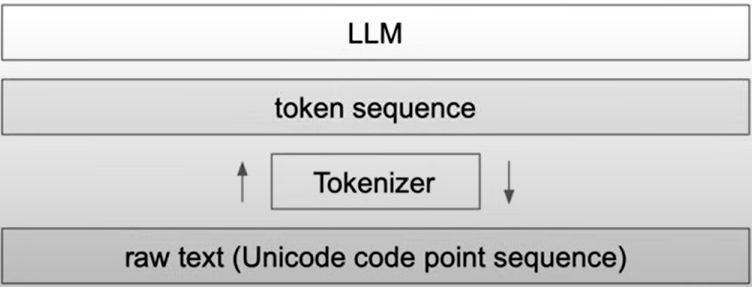

## Decoding

In [ ]:
vocab = {idx: bytes([idx]) for idx in range(256)}
for (p0, p1), idx in merges.items():
  vocab[idx] = vocab[p0] + vocab[p1]  # addition of bytes = concatenation

def decode(ids):
  '''Given ids (list of ints), return a python string'''
  tokens = b''.join(vocab[idx] for idx in ids)  # b'' is a way to concatenate bytes
  text = tokens.decode('utf-8', errors='replace')
  return text

print(decode([128]))

�


In order not to return an error, when character cannot be decoded, we return "?", which represents an invalid character.

In [ ]:
merges

{(101, 32): 256,
 (105, 110): 257,
 (115, 32): 259,
 (116, 104): 262,
 (101, 114): 266,
 (99, 111): 271,
 (116, 32): 277,
 (226, 128): 284,
 (44, 32): 292,
 (97, 110): 301,
 (111, 114): 311,
 (100, 32): 322,
 (97, 114): 334,
 (101, 110): 347,
 (257, 103): 361,
 (271, 100): 376,
 (121, 32): 392,
 (46, 32): 409,
 (97, 108): 427,
 (262, 256): 446}

## Encode

In [ ]:
def encode(text):
  ''' Given a string, return list of ints'''
  return [ord(ch) for ch in text]

print(encode('hello world'))

[104, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100]


In [ ]:
get_stats([101,102,103, 103, 102, 101, 102])

{(101, 102): 2, (102, 103): 1, (103, 103): 1, (103, 102): 1, (102, 101): 1}

In [ ]:
min(get_stats([101,102,103, 103, 102, 101, 102]))

(101, 102)

In [ ]:
def encode(text):
  ''' Given a string, return list of ints'''
  tokens = list(text.encode('utf-8'))
  while len(tokens) >= 2:
    stats = get_stats(tokens)  # returns a dictionary (byte pairs : number of times they occur)
    pair = min(stats, key=lambda p: merges.get(p, float('inf')))  # returns the most eligible merging pair
    # merges.get(p, float('inf')) checks whether a pair p from stats exists in the merges dictionary.
    # Iterates over stats and finds the pair of tokens in stats that has the smallest value based on the merges dictionary.
    if pair not in merges:  # nothing else can be merged
      break
    idx = merges[pair]
    tokens = merge(tokens, pair, idx)
  return tokens

print(encode('hello world'))
print(encode('h'))

[104, 101, 108, 108, 111, 32, 119, 311, 108, 100]
[104]


## Test cases

In [ ]:
print(decode(encode('hello world')))

hello world


In [ ]:
text2 = decode(encode(text))
print(text2 == text)

True


In [ ]:
valtext = 'Many common characters, including numerals, punctuation, and other symbols, are unified within the standard and are not treated as specific to any given writing system. Unicode encodes 3790 emoji, with the continued development thereof conducted by the Consortium as a part of the standard.'
valtext2 = decode(encode(valtext))
print(valtext2 == valtext)

True


## Forced splits using regex patters (GPT series)

https://github.com/openai/gpt-2/blob/master/src/encoder.py

https://www.regular-expressions.info/unicode.html

In [ ]:
import regex as re  # not python's re

gpt2pat = re.compile(r"""'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^\s\p{L}\p{N}]+|\s+(?!\S)|\s+""")

print(re.findall(gpt2pat, 'Hello world123, how\'re      you?   '))

['Hello', ' world', '123', ',', ' how', "'re", '     ', ' you', '?', '   ']


Chunk up the text using this regex pattern, to enforce that some merges don't happen.

- s|'t|'re|'ve|'m|'ll|'d --> these are the most common apostrophes, so we separate them
- However this doesn't work for other types of apostrophes, such as `
- \p{L} is any kind of letter from any language
- ?\p{L}+ -> multiple letters
- space is not a letter, so after 'Hello' the match ends, and we continue with the next characters, searching through the regex pattern
- Next we have optional space followed by letters: ' world'
- \p{N}  -> numbers
- ?[^\s\p{L}\p{N}]+ --> not space, letters or numbers => punctuation symbols
- \s+(?!\S)|\s+  --> white space up to, but not including the last white space character. We do this because we always include the space with the next character.

Basically the GPT-2 Tokenizer really likes to have space + characters or space + numbers.

In [ ]:
example = '''
for i in range(1, 101):
    if i % 3 == 0 and i % 5 == 0:
        print('Fizzbuzz')
    elif i % 3 == 0:
        print('Fizz')
    elif i % 5 == 0:
        print('Buzz')
    else:
      print(i)
'''
print(re.findall(gpt2pat, example))

['\n', 'for', ' i', ' in', ' range', '(', '1', ',', ' 101', '):', '\n   ', ' if', ' i', ' %', ' 3', ' ==', ' 0', ' and', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', "('", 'Fizzbuzz', "')", '\n   ', ' elif', ' i', ' %', ' 3', ' ==', ' 0', ':', '\n       ', ' print', "('", 'Fizz', "')", '\n   ', ' elif', ' i', ' %', ' 5', ' ==', ' 0', ':', '\n       ', ' print', "('", 'Buzz', "')", '\n   ', ' else', ':', '\n     ', ' print', '(', 'i', ')', '\n']


## Tiktoken

In [ ]:
# pip install tiktoken

In [ ]:
import tiktoken

# GPT-2 (does not merge spaces)
enc = tiktoken.get_encoding('gpt2')
print(enc.encode('   hello world!!!'))

# GPT-4 (merges spaces)
enc = tiktoken.get_encoding('cl100k_base')
print(enc.encode('   hello world!!!'))

[220, 220, 23748, 995, 10185]
[256, 24748, 1917, 12340]


Reference the GPT-2 [encoder.py](https://github.com/openai/gpt-2/blob/master/src/encoder.py)
Download the vocab.bpe and encoder.json files.

In [ ]:
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
!wget https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json

--2025-01-16 22:06:06--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/vocab.bpe
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [application/octet-stream]
Saving to: ‘vocab.bpe.1’

vocab.bpe.1         100%[===================>] 445.62K  --.-KB/s    in 0.1s    

2025-01-16 22:06:06 (3.03 MB/s) - ‘vocab.bpe.1’ saved [456318/456318]

--2025-01-16 22:06:07--  https://openaipublic.blob.core.windows.net/gpt-2/models/1558M/encoder.json
Resolving openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)... 57.150.97.129
Connecting to openaipublic.blob.core.windows.net (openaipublic.blob.core.windows.net)|57.150.97.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Sav

In [ ]:
import os, json

with open('encoder.json', 'r') as f:
    encoder = json.load(f) # <--- ~equivalent to our "vocab"

with open('vocab.bpe', 'r', encoding="utf-8") as f:
    bpe_data = f.read()
bpe_merges = [tuple(merge_str.split()) for merge_str in bpe_data.split('\n')[1:-1]]
# ^---- ~equivalent to our "merges"

## Special tokens

In [ ]:
len(encoder) # 256 raw byte tokens + 50k merges + 1 special token

50257

In [ ]:
encoder['<|endoftext|>'] # The only special token in use for the GPT-2 base model

50256

# minbpe

Building my own GPT-4 Tokenizer!

## Step 1

Write the `BasicTokenizer` class, with the following three core functions:

- `def train(self, text, vocab_size, verbose=False)`
- `def encode(self, text)`
- `def decode(self, ids)`

Train your tokenizer on whatever text you like and visualize the merged tokens. Do they look reasonable? One default test you may wish to use is the text file `tests/taylorswift.txt`.

In [ ]:
def get_stats(ids, counts={}):
  counts = {} if counts is None else counts
  for pair in zip(ids, ids[1:]):
    counts[pair] = counts.get(pair, 0) + 1
  return counts


def merge(ids, pair, idx):
  '''
  ids: list of ints
  pair: tuple of ints
  idx: int
  In the list of ints (ids), replace all consecutive occurences of a pair with the new token idx'''
  new_ids = []
  i = 0
  while i < len(ids):
    # If we are not at the very last position AND the pair matches, replace it
    if i < len(ids) - 1 and ids[i] == pair[0] and ids[i+1] == pair[1]:
      new_ids.append(idx)
      i += 2
    else:
      new_ids.append(ids[i])
      i += 1
  return new_ids

print(merge([5, 6, 6, 7, 9, 1], (6, 7), 99))

[5, 6, 99, 9, 1]


In [ ]:
class BasicTokenizer():
  def __init__(self):
    # default: vocab size of 256 (all bytes), no merges, no patterns
    self.merges = {} # (int, int) -> int
    self.pattern = "" # str
    self.vocab = {idx: bytes([idx]) for idx in range(256)} # int -> bytes

  def train(self, text, vocab_size, verbose=False):
    num_merges = vocab_size - 256
    ids = list(text.encode('utf-8'))
    merges = {}
    vocab = {idx: bytes([idx]) for idx in range(256)}

    for i in range(num_merges):
      stats = get_stats(ids)
      pair = max(stats, key=stats.get)
      idx = 256 + i
      ids = merge(ids, pair, idx)
      merges[pair] = idx
      vocab[idx] = vocab[pair[0]] + vocab[pair[1]]
      if verbose:
        print(f'Merge {i+1}/{num_merges}. Merging {pair} into a new token {idx}. ({vocab[idx]} had {stats[pair]} occurences)')

    self.merges = merges
    self.vocab = vocab

  def encode(self, text):
    ''' Given a string, return list of ints'''
    ids = list(text.encode('utf-8'))
    # Now we have to also perform merging
    while len(ids) >= 2:
      stats = get_stats(ids)
      pair = min(stats, key=lambda x: self.merges.get(x, float('inf')))
      if pair not in self.merges:
        break
      idx = self.merges[pair]
      ids = merge(ids, pair, idx)
    return ids

  def decode(self, ids):
    '''Given ids (list of ints), return a python string'''
    return b''.join(self.vocab[idx] for idx in ids).decode('utf-8', errors='replace')

In [ ]:
tokenizer = BasicTokenizer()
text = "aaabdaaabac"
tokenizer.train(text, 256 + 3)
ids = tokenizer.encode(text)
print(ids)
assert ids == [258, 100, 258, 97, 99]
print(tokenizer.decode(tokenizer.encode(text)))
assert tokenizer.decode(tokenizer.encode(text)) == text

[258, 100, 258, 97, 99]
aaabdaaabac


In [ ]:
!wget https://raw.githubusercontent.com/karpathy/minbpe/master/tests/taylorswift.txt

--2025-01-16 23:38:28--  https://raw.githubusercontent.com/karpathy/minbpe/master/tests/taylorswift.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185768 (181K) [text/plain]
Saving to: ‘taylorswift.txt’

taylorswift.txt     100%[===================>] 181.41K  --.-KB/s    in 0.03s   

2025-01-16 23:38:28 (5.19 MB/s) - ‘taylorswift.txt’ saved [185768/185768]



In [ ]:
with open('taylorswift.txt', "r", encoding="utf-8") as file:
  contents = file.read()
print(len(contents))
print(contents[:1000])

185561
Copy paste of the Wikipedia article on Taylor Swift, as of Feb 16, 2024.
---

Main menu

WikipediaThe Free Encyclopedia

Search
Create account
Log in

Personal tools
Contents  hide
(Top)
Life and career
Toggle Life and career subsection
Artistry
Toggle Artistry subsection
Accolades and achievements
Cultural status
Toggle Cultural status subsection
Wealth
Toggle Wealth subsection
Discography
Filmography
Tours
See also
Footnotes
References
Toggle References subsection
External links
Taylor Swift

136 languages
Article
Talk
Read
View source
View history

Tools
 Featured article
Page semi-protected
From Wikipedia, the free encyclopedia
For the album, see Taylor Swift (album).
Taylor Swift
Portrait of Taylor Swift in a cocktail dress
Swift at the 2023 MTV Video Music Awards
Born	Taylor Alison Swift
December 13, 1989 (age 34)
West Reading, Pennsylvania, US
Occupations
Singer-songwriter producer director businesswoman actress
Years active	2004–present
Works
Albumssinglessongsvideosperf

In [ ]:
tokenizer = BasicTokenizer()
ids = tokenizer.encode(text)
decoded = tokenizer.decode(ids)
text == decoded

True

In [ ]:
tokenizer.train(contents, 256+10, True)

Merge 1/10. Merging (107, 105) into a new token 256. (b'ki' had 74 occurences)
Merge 2/10. Merging (105, 256) into a new token 257. (b'iki' had 20 occurences)
Merge 3/10. Merging (87, 257) into a new token 258. (b'Wiki' had 20 occurences)
Merge 4/10. Merging (97, 258) into a new token 259. (b'aWiki' had 1 occurences)
Merge 5/10. Merging (105, 259) into a new token 260. (b'iaWiki' had 1 occurences)
Merge 6/10. Merging (100, 260) into a new token 261. (b'diaWiki' had 1 occurences)
Merge 7/10. Merging (101, 261) into a new token 262. (b'ediaWiki' had 1 occurences)
Merge 8/10. Merging (77, 262) into a new token 263. (b'MediaWiki' had 1 occurences)
Merge 9/10. Merging (32, 263) into a new token 264. (b' MediaWiki' had 1 occurences)
Merge 10/10. Merging (98, 121) into a new token 265. (b'by' had 84 occurences)


## Step 2

Convert you `BasicTokenizer` into a `RegexTokenizer`, which takes a regex pattern and splits the text exactly as GPT-4 would. Process the parts separately as before, then concatenate the results. Retrain your tokenizer and compare the results before and after. You should see that you will now have no tokens that go across categories (numbers, letters, punctuation, more than one whitespace). Use the GPT-4 pattern:

```
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
```

In [ ]:
import regex as re

In [ ]:
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""
pattern = re.compile(GPT4_SPLIT_PATTERN)
text_chunks = re.findall(pattern, contents)
# ids = [x.encode('utf-8') for x in text_chunks]
text_chunks[3]

' the'

In [ ]:
GPT4_SPLIT_PATTERN = r"""'(?i:[sdmt]|ll|ve|re)|[^\r\n\p{L}\p{N}]?+\p{L}+|\p{N}{1,3}| ?[^\s\p{L}\p{N}]++[\r\n]*|\s*[\r\n]|\s+(?!\S)|\s+"""

class RegexTokenizer():
  def __init__(self):
    # default: vocab size of 256 (all bytes), no merges, no patterns
    self.merges = {} # (int, int) -> int
    self.pattern = "" # str
    self.vocab = {idx: bytes([idx]) for idx in range(256)} # int -> bytes
    self.pattern = re.compile(GPT4_SPLIT_PATTERN)

  def train(self, text, vocab_size, verbose=False):
    num_merges = vocab_size - 256

    text_chunks = re.findall(self.pattern, text)
    ids = [list(ch.encode('utf-8')) for ch in text_chunks]

    merges = {}
    vocab = {idx: bytes([idx]) for idx in range(256)}

    for i in range(num_merges):
      stats = {}
      for chunk_ids in ids:
         get_stats(chunk_ids, stats)  # passing in stats will update it in place

      pair = max(stats, key=stats.get)
      idx = 256 + i
      ids = [merge(chunk_ids, pair, idx) for chunk_ids in ids]
      merges[pair] = idx
      vocab[idx] = vocab[pair[0]] + vocab[pair[1]]
      if verbose:
        print(f'Merge {i+1}/{num_merges}. Merging {pair} into a new token {idx}. ({vocab[idx]} had {stats[pair]} occurences)')

    self.merges = merges
    self.vocab = vocab

  def encode(self, text):
    ''' Given a string, return list of ints'''
    ids = list(text.encode('utf-8'))
    # Now we have to also perform merging
    while len(ids) >= 2:
      stats = get_stats(ids)
      pair = min(stats, key=lambda x: self.merges.get(x, float('inf')))
      if pair not in self.merges:
        break
      idx = self.merges[pair]
      ids = merge(ids, pair, idx)
    return ids

  def decode(self, ids):
    '''Given ids (list of ints), return a python string'''
    return b''.join(self.vocab[idx] for idx in ids).decode('utf-8', errors='replace')


In [ ]:
tokenizer = RegexTokenizer()
ids = tokenizer.encode(text)
decoded = tokenizer.decode(ids)
text == decoded

True

In [ ]:
tokenizer = RegexTokenizer()
tokenizer.train(contents, 256+100, True)

Merge 1/100. Merging (101, 114) into a new token 256. (b'er' had 2359 occurences)
Merge 2/100. Merging (50, 48) into a new token 257. (b'20' had 2187 occurences)
Merge 3/100. Merging (111, 114) into a new token 258. (b'or' had 2076 occurences)
Merge 4/100. Merging (105, 110) into a new token 259. (b'in' had 2006 occurences)
Merge 5/100. Merging (101, 100) into a new token 260. (b'ed' had 1876 occurences)
Merge 6/100. Merging (32, 116) into a new token 261. (b' t' had 1824 occurences)
Merge 7/100. Merging (111, 110) into a new token 262. (b'on' had 1815 occurences)
Merge 8/100. Merging (104, 101) into a new token 263. (b'he' had 1772 occurences)
Merge 9/100. Merging (32, 83) into a new token 264. (b' S' had 1633 occurences)
Merge 10/100. Merging (97, 114) into a new token 265. (b'ar' had 1519 occurences)
Merge 11/100. Merging (97, 110) into a new token 266. (b'an' had 1487 occurences)
Merge 12/100. Merging (32, 65) into a new token 267. (b' A' had 1335 occurences)
Merge 13/100. Merging 

### Step 3

You're now ready to load the merges from the GPT-4 tokenizer and show that your tokenizer produces the identical results for both `encode` and `decode`, matching [tiktoken](https://github.com/openai/tiktoken).

```
# match this
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the GPT-4 tokenizer
ids = enc.encode("hello world!!!? (안녕하세요!) lol123 😉")
text = enc.decode(ids) # get the same text back
```

Unfortunately, you will run into two issues:

1. It is not trivial to recover the raw merges from the GPT-4 tokenizer. You can easily recover what we call `vocab` here, and what they call and store under `enc._mergeable_ranks`. Feel free to copy paste the `recover_merges` function in `minbpe/gpt4.py`, which takes these ranks and returns the raw merges. If you wish to know how this function works, read [this](https://github.com/openai/tiktoken/issues/60) and [this](https://github.com/karpathy/minbpe/issues/11#issuecomment-1950805306). Basically, under some conditions it is enough to only store the parent nodes (and their rank) and get rid of the precise details of which children merged up to any parent.
2. Second, the GPT-4 tokenizer for some reason permutes its raw bytes. It stores this permutation in the first 256 elements of the mergeable ranks, so you can recover this byte shuffle relatively simply as `byte_shuffle = {i: enc._mergeable_ranks[bytes([i])] for i in range(256)}`. In both your encode and decode, you'll have to shuffle bytes around accordingly. If you're stuck, reference the minbpe/gpt4.py` file for hints.

### Step 4

(Optional, irritating, not obviously useful) Add the ability to handle special tokens. You'll then be able to match the output of tiktoken even when special tokens are present, e.g.:

```
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the GPT-4 tokenizer
ids = enc.encode("<|endoftext|>hello world", allowed_special="all")
```

Without `allowed_special` tiktoken will error.

### Step 5

If you've made it this far, you're now a pro at LLM Tokenization! Sadly, you're not exactly done yet because a lot of LLMs outside of OpenAI (e.g. Llama, Mistral) use [sentencepiece](https://github.com/google/sentencepiece) instead. Primary difference being that sentencepiece runs BPE directly on Unicode code points instead of on UTF-8 encoded bytes. Feel free to explore sentencepiece on your own (good luck, it's not too pretty), and stretch goal if you really experience and suffer from the burden of time, re-write your BPE to be on Unicode code points and match the Llama 2 tokenizer.

In [ ]:
import tiktoken
enc = tiktoken.get_encoding("cl100k_base") # this is the GPT-4 tokenizer
ids = enc.encode("hello world!!!? (안녕하세요!) lol123 😉")
text = enc.decode(ids) # get the same text back

In [ ]:
tokenizer = RegexTokenizer()
enc = tiktoken.get_encoding("cl100k_base")
tiktoken_ids = enc.encode(contents)
tokenizer.train(contents, 256+64, True)
gpt4_tokenizer_ids = tokenizer.encode(contents)

tiktoken_ids[:10], gpt4_tokenizer_ids[:10]

# assert gpt4_tokenizer_ids == tiktoken_ids

# SentencePiece

Commonly used because (unlike tiktoken) it can efficiently both train and inference BPE tokenizers. It is used in both Llama and Mistral series.

SentencePiece on Github link: https://github.com/google/sentencepiece.

**The big difference**: sentencepiece runs BPE on the Unicode code points directly! It then has an option `character_coverage` for what to do with very very rare codepoints that appear very few times, and it either maps them onto an UNK token, or if `byte_fallback` is turned on, it encodes them with utf-8 and then encodes the raw bytes instead.

TLDR:

- tiktoken encodes to utf-8 and then BPEs bytes
- sentencepiece BPEs the code points and optionally falls back to utf-8 bytes for rare code points (rarity is determined by character_coverage hyperparameter), which then get translated to byte tokens.

In [4]:
import sentencepiece as spm

In [5]:
# write a toy.txt file with some random text
with open("toy.txt", "w", encoding="utf-8") as f:
  f.write("SentencePiece is an unsupervised text tokenizer and detokenizer mainly for Neural Network-based text generation systems where the vocabulary size is predetermined prior to the neural model training. SentencePiece implements subword units (e.g., byte-pair-encoding (BPE) [Sennrich et al.]) and unigram language model [Kudo.]) with the extension of direct training from raw sentences. SentencePiece allows us to make a purely end-to-end system that does not depend on language-specific pre/postprocessing.")

In [6]:
# train a sentencepiece model on it
# the settings here are (best effort) those used for training Llama 2
import os

options = dict(
  # input spec
  input="toy.txt",
  input_format="text",
  # output spec
  model_prefix="tok400", # output filename prefix
  # algorithm spec
  # BPE alg
  model_type="bpe",
  vocab_size=400,
  # normalization (used in NLP pre-LLMs)
  normalization_rule_name="identity",  # Turn off normalization
  remove_extra_whitespaces=False,
  input_sentence_size=200000000, # max number of training sentences
  max_sentence_length=4192, # max number of bytes per sentence
  seed_sentencepiece_size=1000000,
  shuffle_input_sentence=True,
  # rare word treatment
  character_coverage=0.99995,
  byte_fallback=True,
  # merge rules
  split_digits=True,
  split_by_unicode_script=True,
  split_by_whitespace=True,
  split_by_number=True,
  max_sentencepiece_length=16,
  add_dummy_prefix=True,  # adds space in front of the sentence, in order to have an equal token for e.g.: world in 'world' and 'hello world'
  allow_whitespace_only_pieces=True,
  # special tokens
  unk_id=0, # the UNK token MUST exist
  bos_id=1, # the others are optional, set to -1 to turn off
  eos_id=2,
  pad_id=-1,
  # systems
  num_threads=os.cpu_count(), # use ~all system resources
)

spm.SentencePieceTrainer.train(**options)

In [11]:
sp = spm.SentencePieceProcessor()
sp.load('tok400.model')
vocab = [[sp.id_to_piece(idx) for idx in range(sp.get_piece_size())]]
# vocab

It starts with special tokens, then 256 byte tokens, then the merges, then the individual code points tokens.

In [8]:
ids = sp.encode('hello како си?')
print(ids)

[362, 378, 361, 372, 358, 362, 211, 189, 211, 179, 211, 189, 211, 193, 362, 212, 132, 211, 187, 66]


In [10]:
# Decode
print([sp.id_to_piece(idx) for idx in ids])

['▁', 'h', 'e', 'l', 'lo', '▁', '<0xD0>', '<0xBA>', '<0xD0>', '<0xB0>', '<0xD0>', '<0xBA>', '<0xD0>', '<0xBE>', '▁', '<0xD1>', '<0x81>', '<0xD0>', '<0xB8>', '<0x3F>']


 byte_fallback = True, so we use the UTF-8 representation of the Unknown tokens (the cyrillic characters).

 If byte_fallback = False, when we encode a sequence of unknown characters, we will get 0 for it (or \<unk> when we decode).

**Llama 2 tokenizer proto**


If you'd like to export the raw protocol buffer for the `tokenizer.model` released by meta, this is a [helpful issue](https://github.com/google/sentencepiece/issues/121). And this is the result:

```
normalizer_spec {
  name: "identity"
  precompiled_charsmap: ""
  add_dummy_prefix: true
  remove_extra_whitespaces: false
  normalization_rule_tsv: ""
}

trainer_spec {
  input: "/large_experiments/theorem/datasets/MERGED/all.test1.merged"
  model_prefix: "spm_model_32k_200M_charcov099995_allowWSO__v2"
  model_type: BPE
  vocab_size: 32000
  self_test_sample_size: 0
  input_format: "text"
  character_coverage: 0.99995
  input_sentence_size: 200000000
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  num_threads: 80
  num_sub_iterations: 2
  max_sentence_length: 4192
  shuffle_input_sentence: true
  max_sentencepiece_length: 16
  split_by_unicode_script: true
  split_by_whitespace: true
  split_by_number: true
  treat_whitespace_as_suffix: false
  split_digits: true
  allow_whitespace_only_pieces: true
  vocabulary_output_piece_score: true
  hard_vocab_limit: true
  use_all_vocab: false
  byte_fallback: true
  required_chars: ""
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_surface: " \342\201\207 "
  unk_piece: "<unk>"
  bos_piece: "<s>"
  eos_piece: "</s>"
  pad_piece: "<pad>"
  train_extremely_large_corpus: false
  enable_differential_privacy: false
  differential_privacy_noise_level: 0.0
  differential_privacy_clipping_threshold: 0
}
```

# vocab_size

- Q: what should be vocab size?
- Q: how can I increase vocab size?
- A: let's see. Reminder: [gpt.py](https://github.com/karpathy/ng-video-lecture/blob/master/gpt.py) from before.

vocab_size defines the number of rows of the input embedding table. Also at the end, in order to get the logits, we make a linear projection to the vocab_size space.

# Final recommendations

- Don't brush off tokenization. A lot of footguns and sharp edges here. Security issues. Safety issues.
- Eternal glory to anyone who can delete tokenization as a required step in LLMs.
- In your own application:
  - Maybe you can just re-use the GPT-4 tokens and tiktoken?
  - If you're training a vocab, ok to use BPE with sentencepiece. Careful with the million settings.
  - Switch to minbpe once it is as efficient as sentencepiece :)
